In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

0,0.jpg,83110

83110


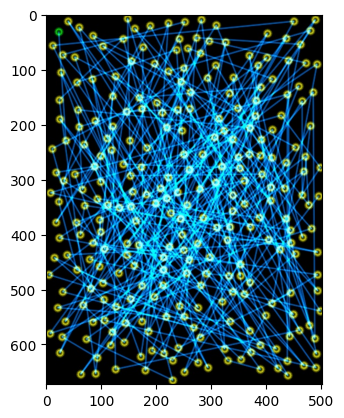

In [15]:
pic_num = 0

image = mpimg.imread(f'tsp-cv/{pic_num}.jpg')

with open('tsp-cv/train.csv') as f:
    for i, line in enumerate(f):
        if i == pic_num+1:
            print(line)
            true_lenght = int(line.split(',')[2])
            break

print(true_lenght)
plt.imshow(image)

In [16]:
import circle_detection_functions
import line_detection_functions

from functools import partial

In [17]:
circle_detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)
line_detecter_function = partial(line_detection_functions.get_next_pos)

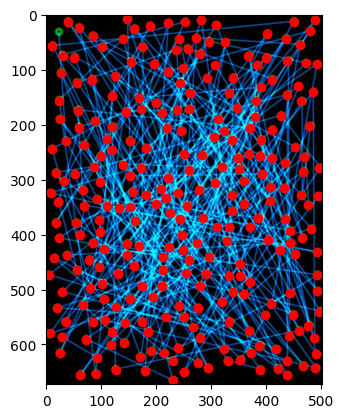

In [18]:
#detect the circles

detected_positions = list(circle_detecter_function(image))

plt.imshow(image)
for p in detected_positions:
    plt.plot(p[0], p[1], 'ro')

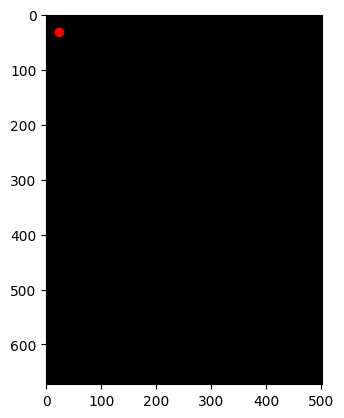

In [19]:
#detect the green circle
image_cp = image.copy()
image_cp = image_cp.astype('int32')
green_matrix = image_cp[:,:,1] - image_cp[:,:,0] - image_cp[:,:,2] - 100
green_matrix = green_matrix.clip(min=0)

all_green_positions = np.nonzero(green_matrix)

average_green_position = np.mean(all_green_positions, axis=1)

start_pos = (int(average_green_position[1]), int(average_green_position[0]))

plt.imshow(green_matrix, cmap='gray')
plt.plot(start_pos[0],start_pos[1], 'ro')


In [20]:
#detect the lines
remaining_positions = list(detected_positions.copy())

current_pos = start_pos

sorted_positions = [current_pos]
while len(remaining_positions) > 0:
    next_pos = line_detecter_function(image, current_pos, remaining_positions)
    print("detected next_pos: ",remaining_positions[next_pos])
    current_pos = remaining_positions.pop(next_pos)
    sorted_positions.append(current_pos)

detected next_pos:  [ 35 229]
detected next_pos:  [159 457]
detected next_pos:  [244 123]
detected next_pos:  [219 206]
detected next_pos:  [153 350]
detected next_pos:  [212 465]
detected next_pos:  [152 518]
detected next_pos:  [251 550]
detected next_pos:  [284 255]
detected next_pos:  [421 644]
detected next_pos:  [ 54 378]
detected next_pos:  [369 254]
detected next_pos:  [181 328]
detected next_pos:  [132 351]
detected next_pos:  [211 493]
detected next_pos:  [255 470]
detected next_pos:  [217 550]
detected next_pos:  [370 206]
detected next_pos:  [349 260]
detected next_pos:  [407 339]
detected next_pos:  [443 393]
detected next_pos:  [435 371]
detected next_pos:  [444 416]
detected next_pos:  [407 314]
detected next_pos:  [390 228]
detected next_pos:  [381 157]
detected next_pos:  [285 370]
detected next_pos:  [249 428]
detected next_pos:  [ 67 529]
detected next_pos:  [274 416]
detected next_pos:  [260 446]
detected next_pos:  [213 441]
detected next_pos:  [174 494]
detected n

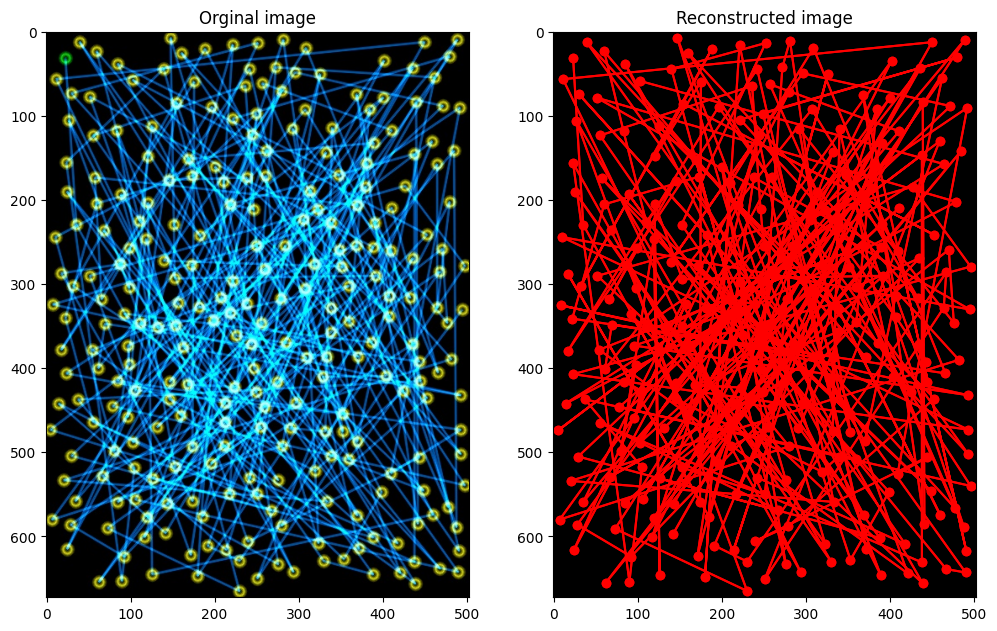

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')

In [22]:
print("orginal path lenght: ", true_lenght)

lenght = 0
for i in range(1, len(sorted_positions)):
    lenght += np.linalg.norm(np.array(sorted_positions[i]) - np.array(sorted_positions[i-1]))

print("Lenght of the path: ", lenght)

orginal path lenght:  83110
Lenght of the path:  81947.41543991528
